# Pollution and mental performance in BCN

## Inicialització

In [176]:
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [177]:
import pandas as pd

df = pd.read_csv('CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')

## Anàlisi exploratori de dades inicial

In [178]:
print(f"Les seves dimensions són: {df.shape[0]} individus i {df.shape[1]} variables")
print(f"Llistat de variables: {list(df.columns)}")

Les seves dimensions són: 3348 individus i 95 variables
Llistat de variables: ['ID_Zenodo', 'date_all', 'year', 'month', 'day', 'dayoftheweek', 'hour', 'mentalhealth_survey', 'occurrence_mental', 'bienestar', 'energia', 'estres', 'sueno', 'horasfuera', 'actividadfisica', 'ordenador', 'dieta', 'alcohol', 'drogas', 'bebida', 'enfermo', 'otrofactor', 'stroop_test', 'occurrence_stroop', 'mean_incongruent', 'correct', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control', 'z_performance', 'z_mean_incongruent', 'z_inhib_control', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h', 'no2gps_12h', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'min_gps', 'hour_gps', 'pm25bcn', 'BCμg', 'sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'hours_noise_55_day', 'hours_noise_65_day', 'hours_greenblue_day', 'tmean_24h', 'tmean_12h', 'humi_24h', 'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h', 'precip_12h_binary', 'precip_24h_binary', 'ma

Codifiquem algunes variables com a categòriques, i n'eliminem algunes ja que no són rellevants o contenen informació repetida en altres.
Més endavant valorarem si, estudiant les correlacions, cal treure'n més.

In [179]:
list_to_cat = ['ID_Zenodo', 'year', 'month', 'day', 'dayoftheweek', 'hour',
               'mentalhealth_survey', 'bienestar', 'energia', 'estres', 'sueno', 
               'occurrence_stroop', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in list_to_cat:
    df[name] = df[name].astype('category')

In [180]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

In [181]:
eliminations = ['date_all', 'mean_incongruent', 'correct', 'response_duration_ms',
                'mean_congruent', 'horasfuera', 'performance', 'inhib_control', 'z_mean_incongruent',
                'z_inhib_control', 'no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30',
                'no2gps_24h_x30', 'min_gps', 'hour_gps', 'sec_noise55_day', 'sec_noise65_day',
                'sec_greenblue_day', 'Houron', 'Houroff', 'start_day', 'start_month', 'start_year',
                'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime', 
                'Totaltime_estimated', 'mentalhealth_survey', 'stroop_test', 'occurrence_stroop',
                'yearbirth', 'year', 'month', 'day', 'hour', 'µgm3']
df = df.drop(eliminations, axis=1)

Procedim a realitzar alguns gràfics

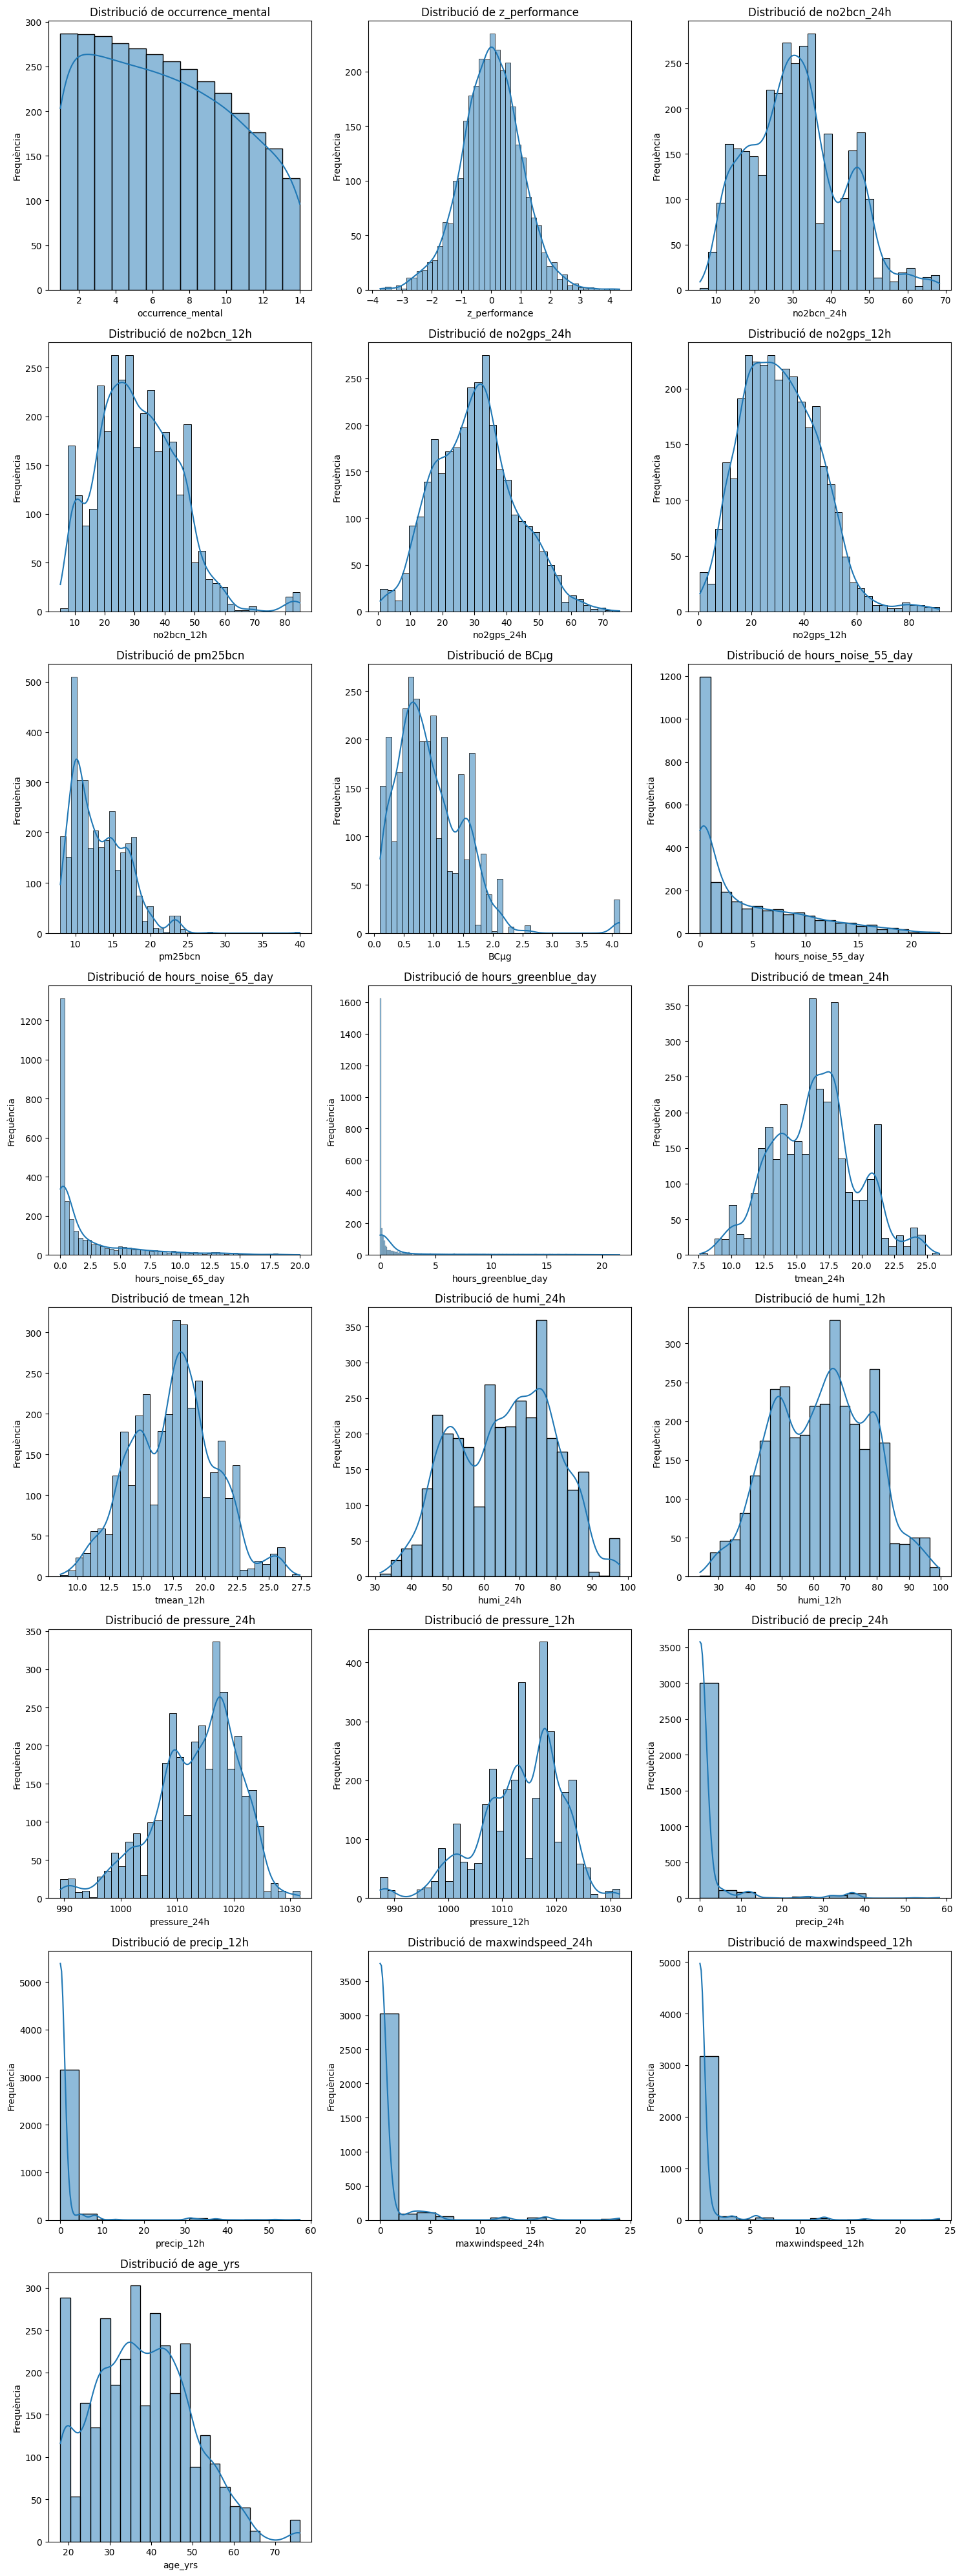

In [182]:
# Gráfics de distribució per variables numèriques
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(df[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


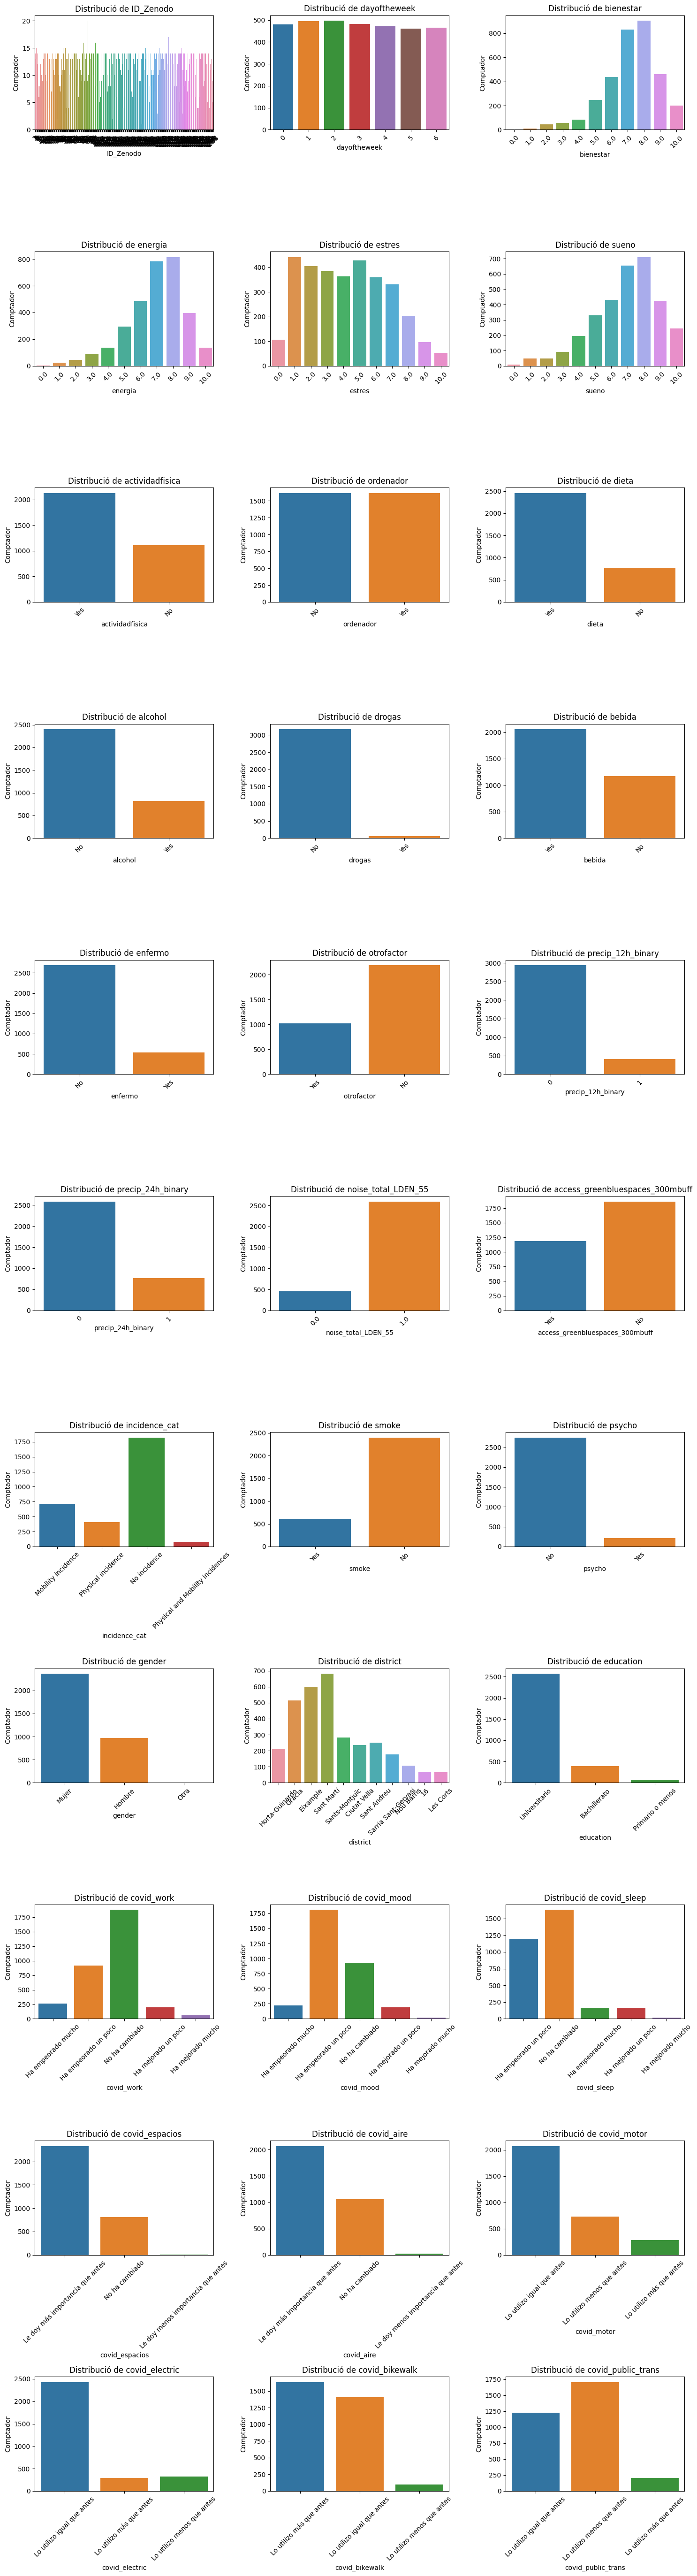

In [183]:
# Gráfics de barres per variables categòriques
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=df, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

Visualitzem els missing values per variable

,missing_values
occurrence_mental,68
bienestar,75
energia,141
estres,175
sueno,158
actividadfisica,116
ordenador,121
dieta,122
alcohol,126
drogas,121


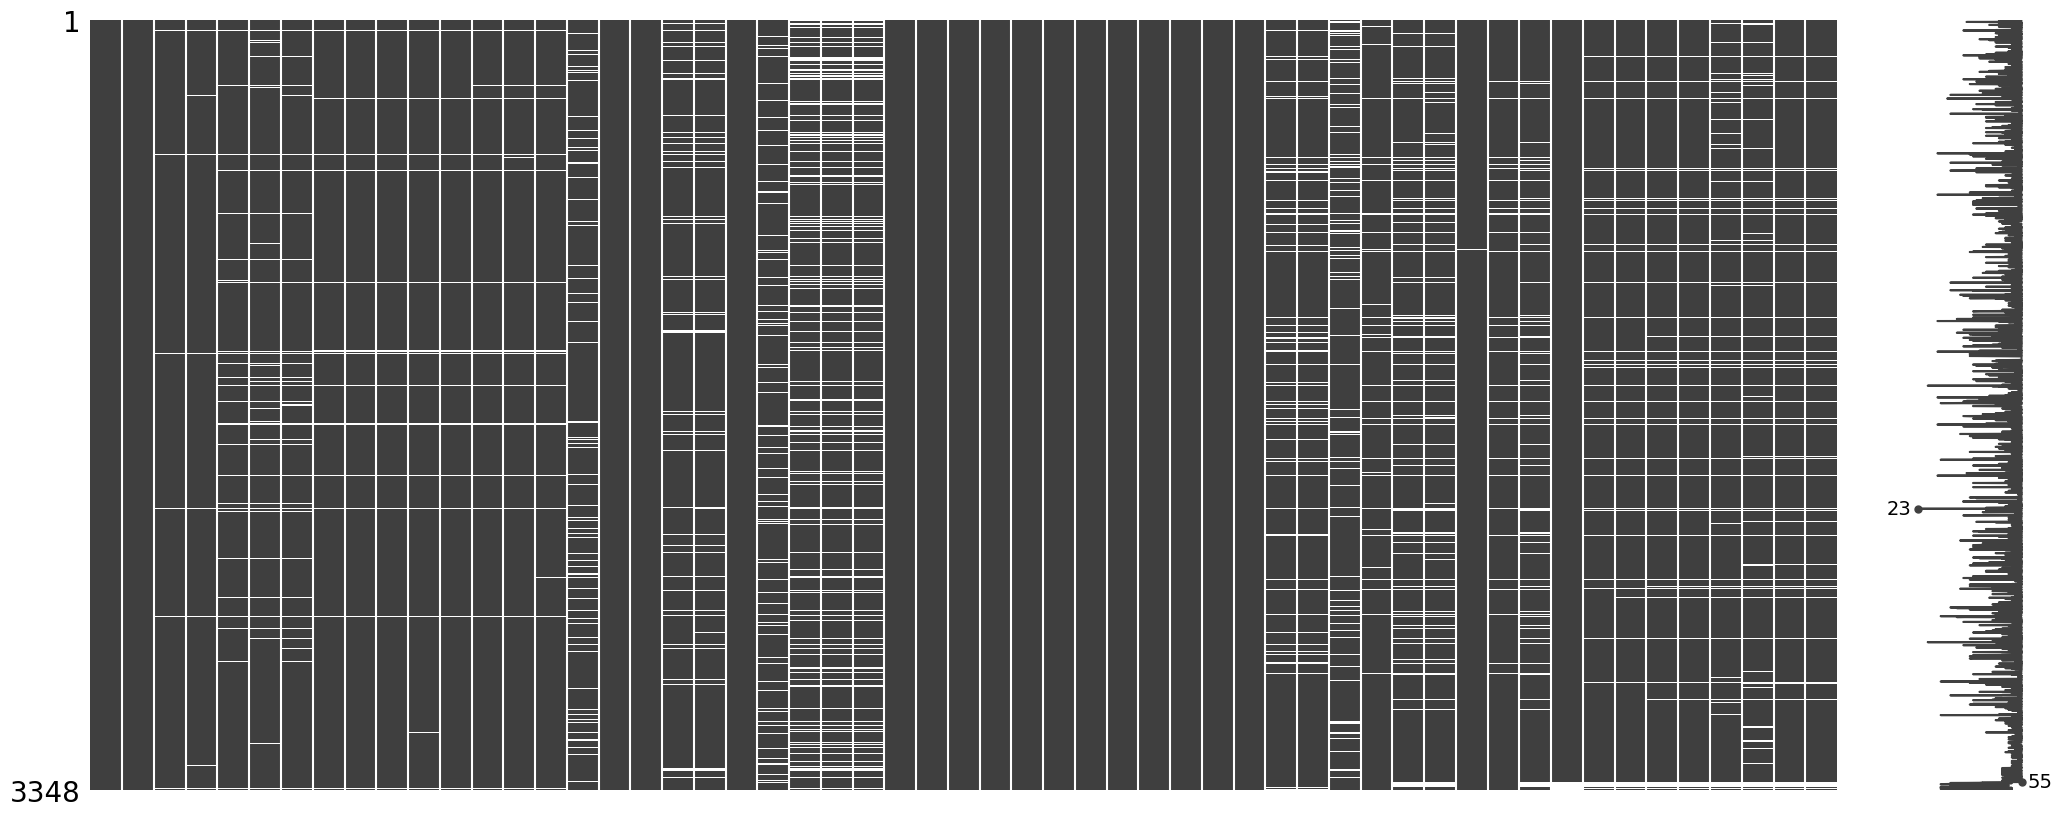

In [184]:
import missingno as msno
msno.matrix(df)

missing_values1 = df.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

In [185]:
df.shape

(3348, 55)

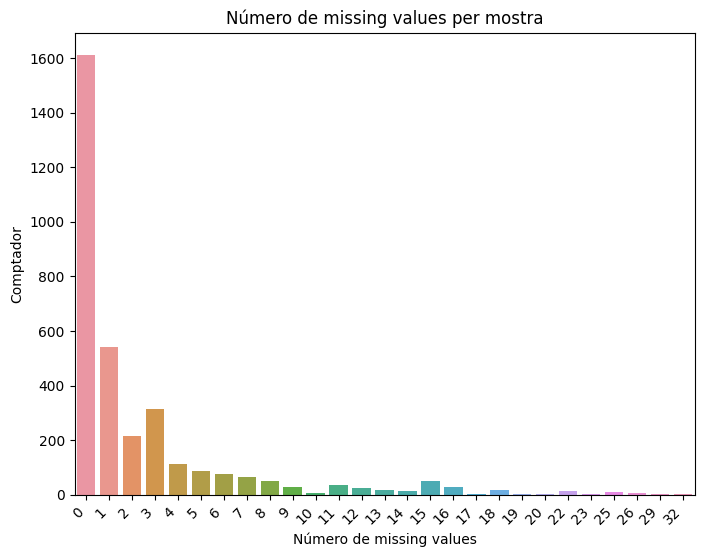

In [186]:
# Barplot amb el numero de missing values per fila 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.isnull().sum(axis=1))
plt.title(f'Número de missing values per mostra')
plt.xlabel('Número de missing values')
plt.ylabel('Comptador')
plt.xticks(rotation=45, ha='right')  # Rotar les etiquetes de l'eix x per a una major llegibilitat
plt.show()


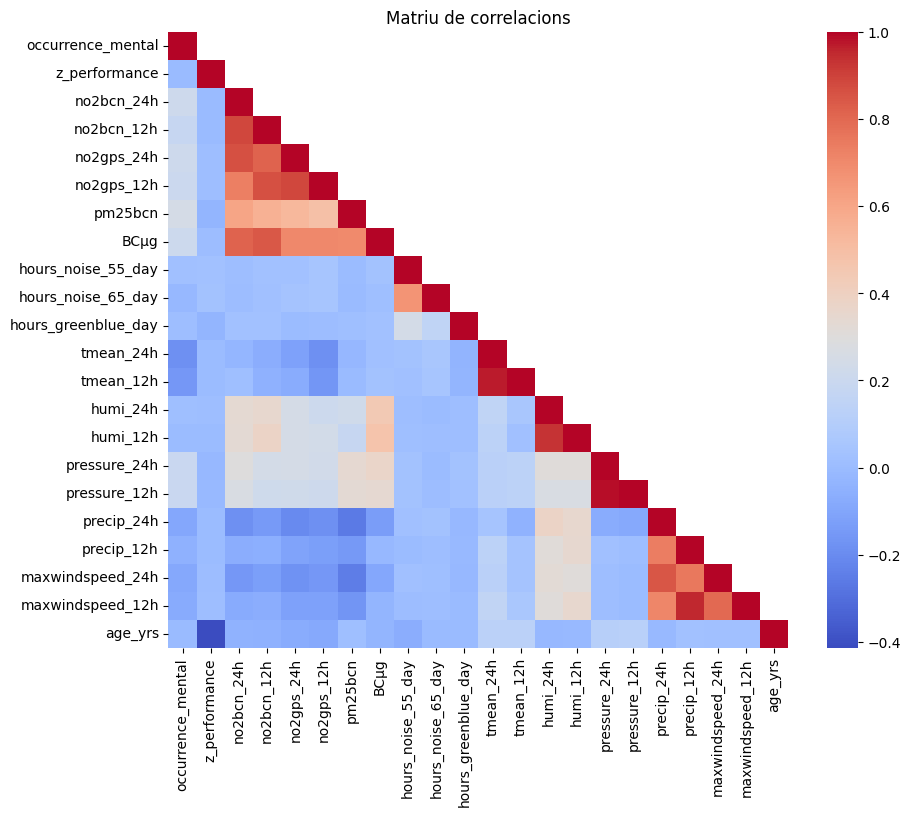

In [187]:
# Creem un nou DataFrame només amb les variables numèriques
df_numeric = df.select_dtypes(include=[np.number])

# Calculem la matriu de correlació
corr = df_numeric.corr()

# Creem una màscara per a la part superior del triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Plotejem la matriu de correlació
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title('Matriu de correlacions')
plt.show()

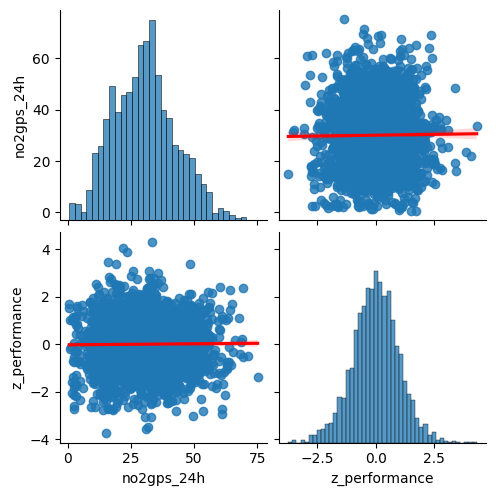

In [188]:
df_numeric = df[['no2gps_24h', 'z_performance']]
sns.pairplot(df_numeric, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

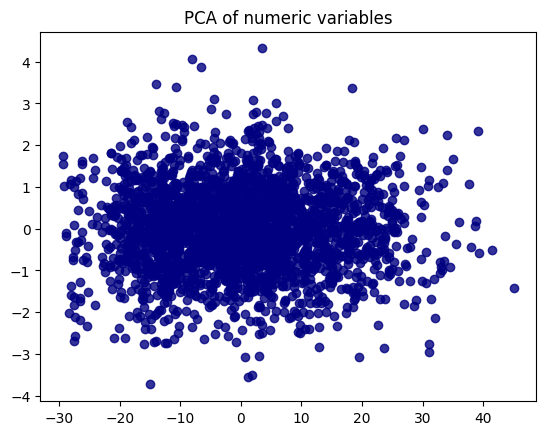

In [189]:
pca = PCA(n_components=2)

no_miss = df_numeric.dropna()
X_r = pca.fit_transform(no_miss)

# Plot PCA results
plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], color='navy', alpha=.8)
plt.title('PCA of numeric variables')

plt.show()

## Preprocessament

CAL SEPARAR EN TRAIN I TEST PERÒ ÉS PER VEURE MÉS O MENYS QUÈ PODEM FER

Eliminem els missing de performance

In [190]:
deleted_na_perf = df.dropna(subset="z_performance")

missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
occurrence_mental,68
bienestar,75
energia,139
estres,170
sueno,155
actividadfisica,114
ordenador,119
dieta,120
alcohol,123
drogas,119


In [191]:
deleted_na_perf.shape

(3046, 55)

In [192]:
deleted_na_perf = deleted_na_perf[deleted_na_perf.isnull().sum(axis=1) < 10]

In [193]:
deleted_na_perf.shape

(2814, 55)

In [194]:
missing_values1 = deleted_na_perf.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,6
ordenador,8
dieta,9
alcohol,12
drogas,8
bebida,9


In [195]:
deleted_na_cols = deleted_na_perf.dropna(axis=1, thresh=len(deleted_na_perf)-280)

In [196]:
missing_values1 = deleted_na_cols.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,7
energia,33
estres,60
sueno,46
actividadfisica,6
ordenador,8
dieta,9
alcohol,12
drogas,8
bebida,9


<Axes: >

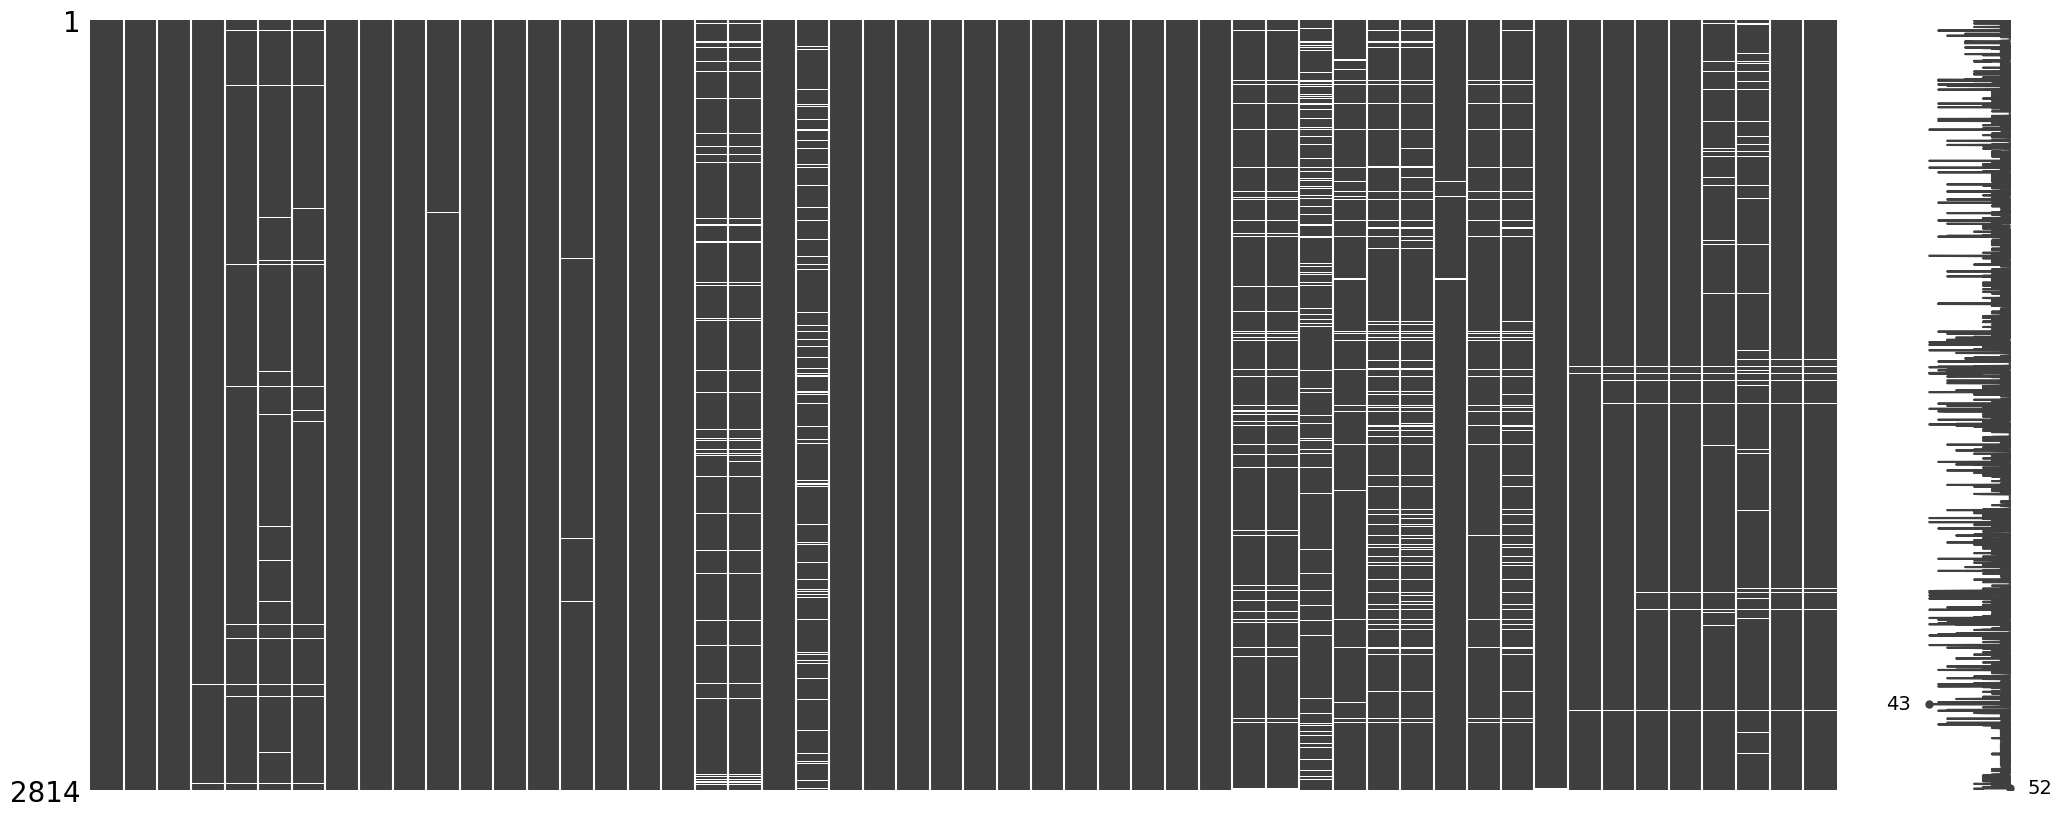

In [197]:
msno.matrix(deleted_na_cols)

In [198]:
unique_na = deleted_na_perf.drop_duplicates("ID_Zenodo")

In [199]:
missing_values1 = unique_na.isnull().sum()
missing_values1 = missing_values1[missing_values1 > 0]
missing_values1 = pd.DataFrame(missing_values1, columns=['missing_values'])
missing_values1

,missing_values
bienestar,1
energia,6
estres,10
sueno,7
actividadfisica,1
ordenador,1
dieta,1
alcohol,1
drogas,1
bebida,2


## Partició en Train i Test

In [200]:
from sklearn.model_selection import train_test_split
X = deleted_na_cols[deleted_na_cols.columns.drop("z_performance")]
y = deleted_na_cols["z_performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [201]:
num_cols = X_train.select_dtypes(include='number').columns
print(X_train[num_cols])

      occurrence_mental  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  \
2042                9.0   16.178571   12.238095   16.953311   17.541355   
2579                1.0   31.720238   23.678571   32.837443   17.471924   
2806               12.0   39.908730   37.948413   37.439314   34.842862   
2973                5.0   20.507937   20.373016   22.340237   22.426568   
1195                9.0   27.184722   32.438889   30.224325   36.406738   
...                 ...         ...         ...         ...         ...   
1922               10.0   29.934722   44.202778   14.969844   20.588058   
1276                5.0   37.334325   50.537698   38.132175   50.784098   
1319                3.0   28.250992   27.799603   36.395694   27.629517   
1513                8.0   27.486111   31.069444   22.078491   27.639730   
1003                5.0   59.315476   56.928571   61.934506   50.337646   

        pm25bcn      BCμg  tmean_24h  tmean_12h   humi_24h   humi_12h  \
2042   8.433333  0.211821 

Usem un imputador per emplenar la resta de missings

In [202]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num_cols = X_train.select_dtypes(include='number').columns

numeric_delna = X_train[num_cols]
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(numeric_delna)

X_train[num_cols] = imp_mean.transform(numeric_delna)
X_test[num_cols] = imp_mean.transform(X_test[num_cols])

In [203]:
print(X_train[num_cols])

      occurrence_mental  no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  \
2042                9.0   16.178571   12.238095   16.953311   17.541355   
2579                1.0   31.720238   23.678571   32.837443   17.471924   
2806               12.0   39.908730   37.948413   37.439314   34.842862   
2973                5.0   20.507937   20.373016   22.340237   22.426568   
1195                9.0   27.184722   32.438889   30.224325   36.406738   
...                 ...         ...         ...         ...         ...   
1922               10.0   29.934722   44.202778   14.969844   20.588058   
1276                5.0   37.334325   50.537698   38.132175   50.784098   
1319                3.0   28.250992   27.799603   36.395694   27.629517   
1513                8.0   27.486111   31.069444   22.078491   27.639730   
1003                5.0   59.315476   56.928571   61.934506   50.337646   

        pm25bcn      BCμg  tmean_24h  tmean_12h   humi_24h   humi_12h  \
2042   8.433333  0.211821 

Ens queden les categòriques. Emplenem amb KNN

In [204]:
from sklearn.neighbors import NearestNeighbors

class KNNImputer:
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
    def fit(self, X, numeric_cols):
        self.X = X.copy() # suposem que les numeriques estan imputades
        self.numeric = numeric_cols
        self.vecinos = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X.dropna()[numeric_cols])
    def _get_mode(self, variable, indexs):
        vecinos = [self.X.iloc[[i]].iloc[0] for i in indexs[0]]
        valors = [v.iloc[variable] for v in vecinos]
        unique, counts = np.unique(valors, return_counts = True)
        mode = unique[np.argmax(counts)]
        return mode
    def _impute_row(self, row):
        dist, indexs = self.vecinos.kneighbors([row[self.numeric]])
        for variable, value in enumerate(row.isna()):
            if value:
                mode = self._get_mode(variable, indexs)
                row.iloc[variable] = mode
        return row
    def transform(self, X):
        X_imputed = []
        for ind, row in X.iterrows():
            new_row = self._impute_row(row)
            X_imputed.append(new_row)
        return pd.DataFrame(X_imputed, columns=X.columns)

In [205]:
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

imputer = KNNImputer()

imputer.fit(X_train, num_cols)

X_train_new = imputer.transform(X_train)
X_test_new = imputer.transform(X_test)

X_train_new.head()

,ID_Zenodo,dayoftheweek,occurrence_mental,bienestar,energia,estres,sueno,actividadfisica,ordenador,dieta,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
2042,31,0,9.0,7.0,7.0,1.0,7.0,Yes,Yes,Yes,...,Universitario,No ha cambiado,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes
2579,63,3,1.0,9.0,8.0,2.0,7.0,Yes,No,Yes,...,Universitario,No ha cambiado,No ha cambiado,Ha mejorado un poco,No ha cambiado,No ha cambiado,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo menos que antes
2806,271,2,12.0,6.0,4.0,6.0,8.0,No,Yes,Yes,...,Universitario,No ha cambiado,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes
2973,276,2,5.0,7.0,8.0,7.0,7.0,No,Yes,Yes,...,Universitario,No ha cambiado,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo menos que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
1195,273,1,9.0,9.0,8.0,1.0,10.0,Yes,No,Yes,...,Universitario,No ha cambiado,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo menos que antes


In [206]:
X_train_new.shape

(2251, 51)

In [207]:
# Mode imputation
"""
for col in deleted_na_perf.columns:
    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])
"""

'\nfor col in deleted_na_perf.columns:\n    deleted_na_perf[col] = deleted_na_perf[col].fillna(value=deleted_na_perf[col].mode()[0])\n'

Tractem les variables textuals de COVID

In [208]:
covid = ['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire',
                'covid_motor', 'covid_electric', 'covid_bikewalk', 'covid_public_trans']

for column in covid:
    X_train_new[column] = X_train_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')
    X_test_new[column] = X_test_new[column].apply(lambda x: 'Yes' if 'no' in x.lower() or 'igual' in x.lower() else 'No')

# print categories for covid variables

for col in covid:
    print(f'{col}: {X_train_new[col].unique()}')

covid_work: ['Yes' 'No']
covid_mood: ['Yes' 'No']
covid_sleep: ['Yes' 'No']
covid_espacios: ['No' 'Yes']
covid_aire: ['No' 'Yes']
covid_motor: ['Yes' 'No']
covid_electric: ['Yes' 'No']
covid_bikewalk: ['Yes' 'No']
covid_public_trans: ['Yes' 'No']


In [209]:
# Creem una nova variable anomenada 'covid_afecta' binaria, on True indica que la persona ha estat afectada per la covid i False en cas contrari.
# Aquesta variable es crea a partir de les variables de la llista 'covid', i fem la moda de les respostes per a cada individu.

for row in X_train_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_train_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_train_new.at[row[0], 'covid_afecta'] = 'No'

for row in X_test_new.iterrows():
    # Si la moda de les respostes de les variables de la llista 'covid' és 'Yes', la persona ha estat afectada per la covid
    if row[1][covid].mode()[0] == 'Yes':
        X_test_new.at[row[0], 'covid_afecta'] = 'Yes'
    else:
        X_test_new.at[row[0], 'covid_afecta'] = 'No'

# Eliminem les variables de la llista 'covid' ja que ja no les necessitem
X_train_new = X_train_new.drop(covid, axis=1)
X_test_new = X_test_new.drop(covid, axis=1)

print(X_train_new['covid_afecta'].value_counts())

covid_afecta
Yes    1450
No      801
Name: count, dtype: int64


## Recodificació de variables

In [210]:
to_cat = ['ID_Zenodo', 'precip_12h_binary', 'precip_24h_binary',
               'noise_total_LDEN_55']

for name in to_cat:
    X_train_new[name] = X_train_new[name].astype('category')
    X_test_new[name] = X_test_new[name].astype('category')

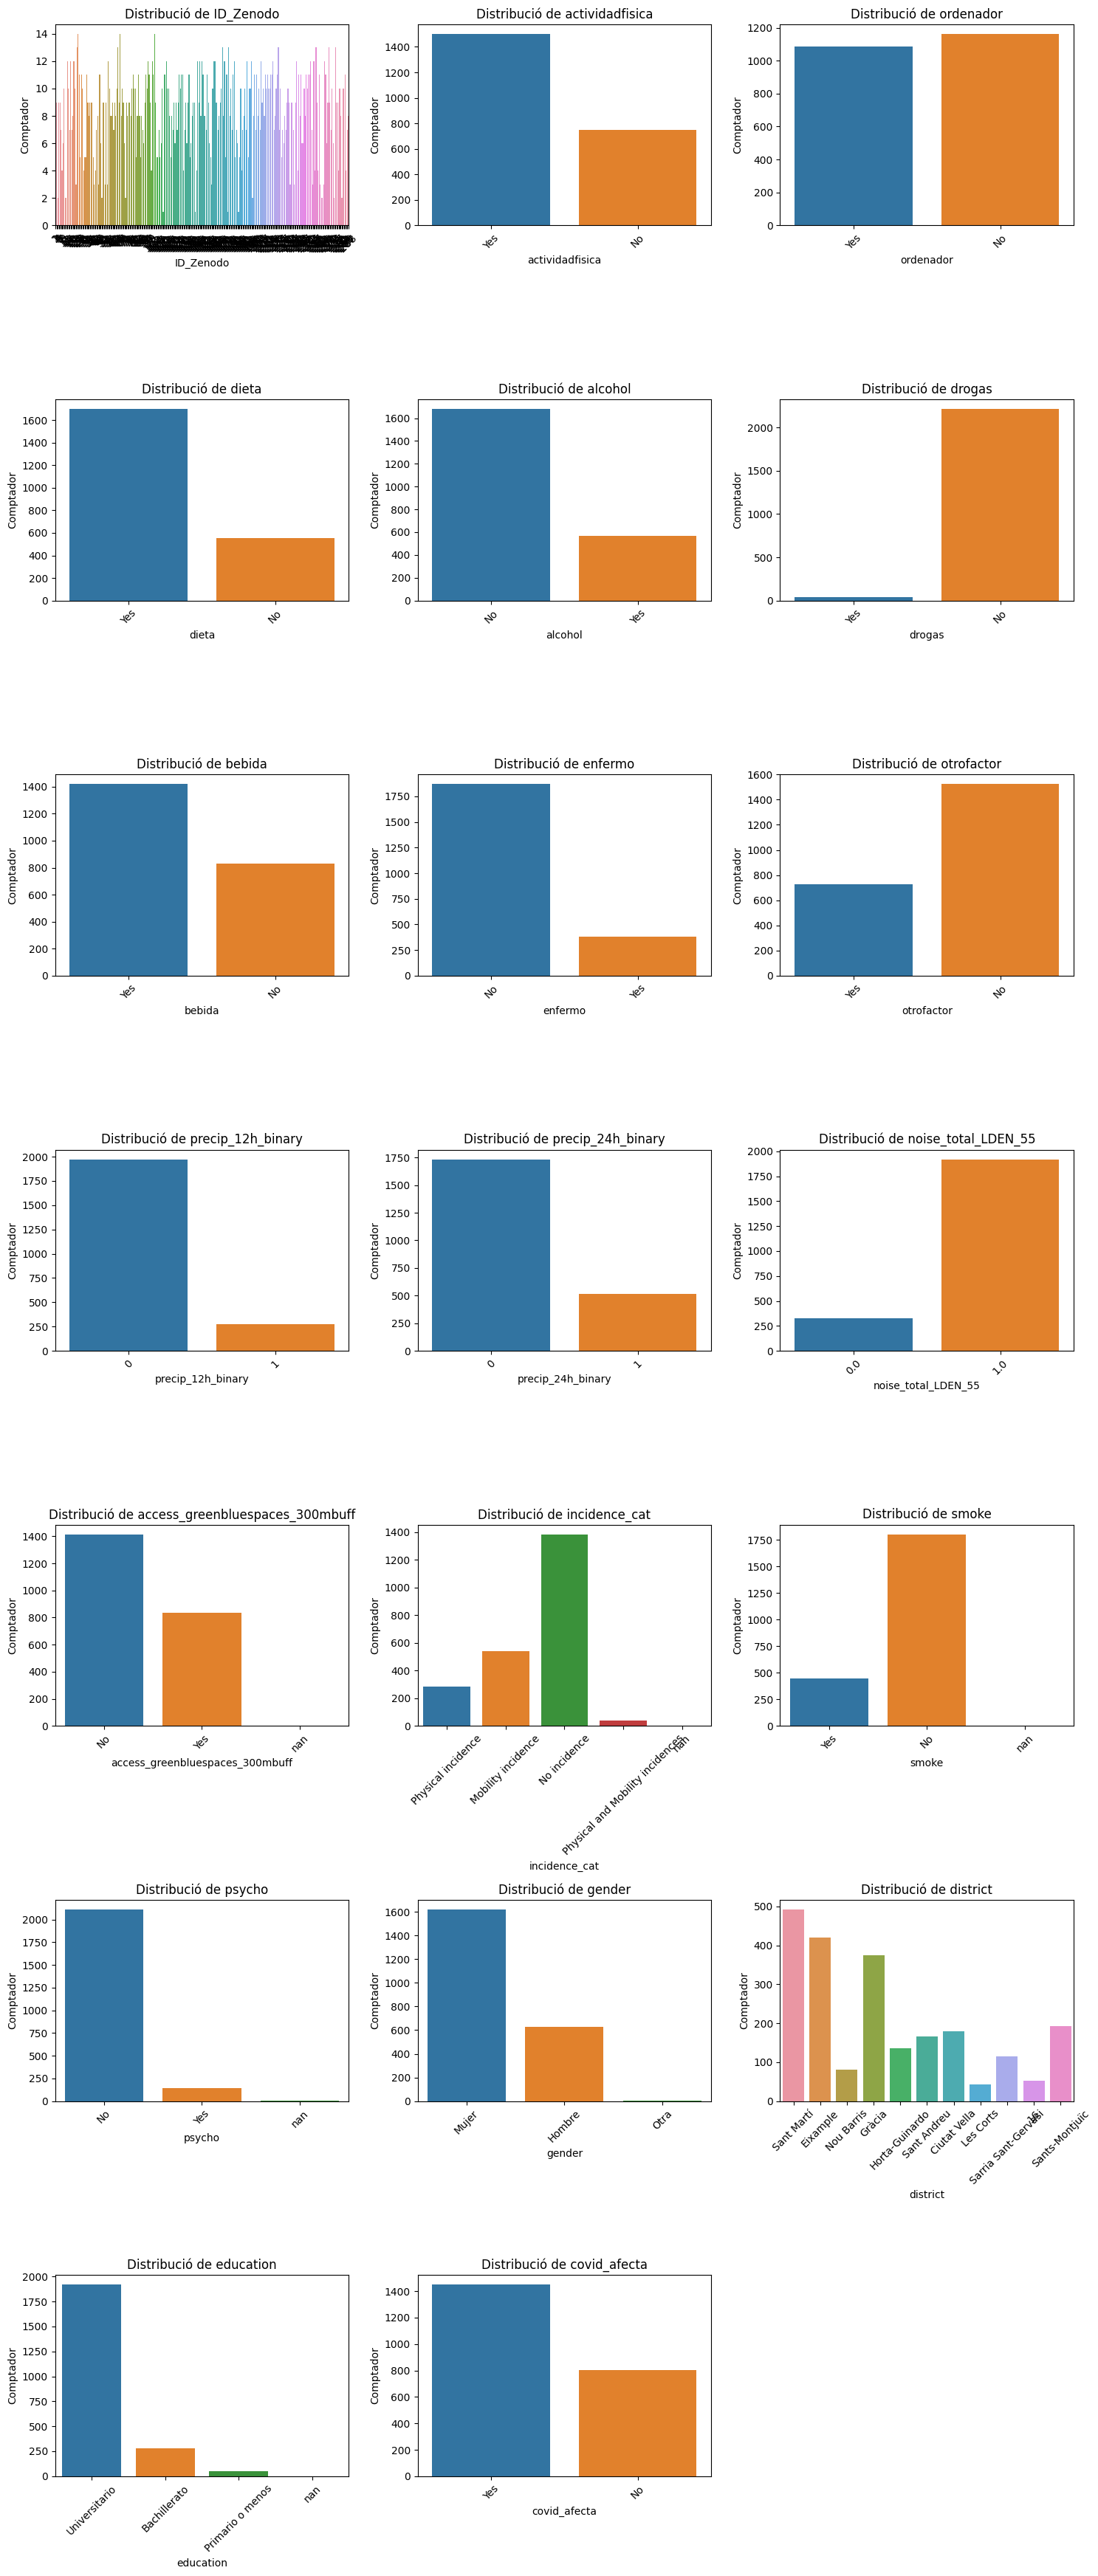

In [211]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_new, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

In [212]:
# Apliquem One Hot Encoding a les variables categòriques
from sklearn.preprocessing import OneHotEncoder

cat_cols = X_train_new.select_dtypes(include=['object', 'category']).columns
cat_cols = cat_cols.drop('ID_Zenodo')

hot_encoder = OneHotEncoder(drop = 'if_binary')
hot_encoder.fit(X_train_new[cat_cols])

# Apply the encoding to the train set
X_train_encoded = X_train_new.copy()
encoded_cols = hot_encoder.transform(X_train_new[cat_cols]).toarray()
X_train_encoded = X_train_encoded.drop(columns=cat_cols)
X_train_encoded = pd.concat([X_train_encoded, pd.DataFrame(encoded_cols, columns = hot_encoder.get_feature_names_out())], axis=1)

# Apply the encoding to the test set
X_test_encoded = X_test_new.copy()
encoded_cols_test = hot_encoder.transform(X_test_new[cat_cols]).toarray()
X_test_encoded = X_test_encoded.drop(columns=cat_cols)
X_test_encoded = pd.concat([X_test_encoded, pd.DataFrame(encoded_cols_test, columns = hot_encoder.get_feature_names_out())], axis=1)



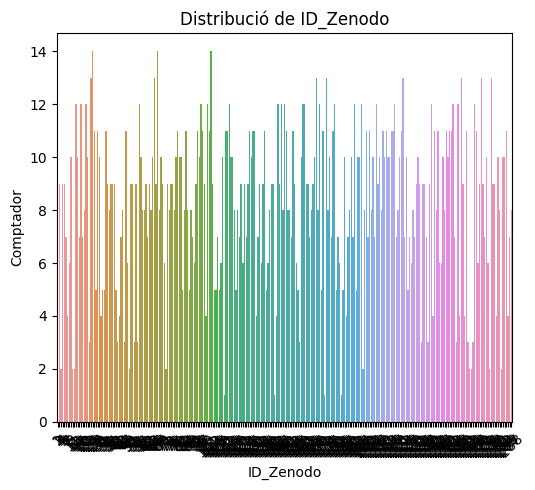

In [213]:
# Gráfics de barres per variables categòriques
cat_cols = X_train_encoded.select_dtypes(include=['object', 'category']).columns
cat_plots = len(cat_cols)
cat_rows = math.ceil(cat_plots / 3)

fig, axs = plt.subplots(cat_rows, 3, figsize=(15, cat_rows*5))
axs = axs.ravel() 

for i in range(len(axs)):
    if i < len(cat_cols):
        sns.countplot(data=X_train_encoded, x=cat_cols[i], ax=axs[i])
        axs[i].set_title(f'Distribució de {cat_cols[i]}')
        axs[i].set_xlabel(cat_cols[i])
        axs[i].set_ylabel('Comptador')
        axs[i].tick_params(axis='x', rotation=45)
    else:
        fig.delaxes(axs[i])  

plt.tight_layout()
plt.show()

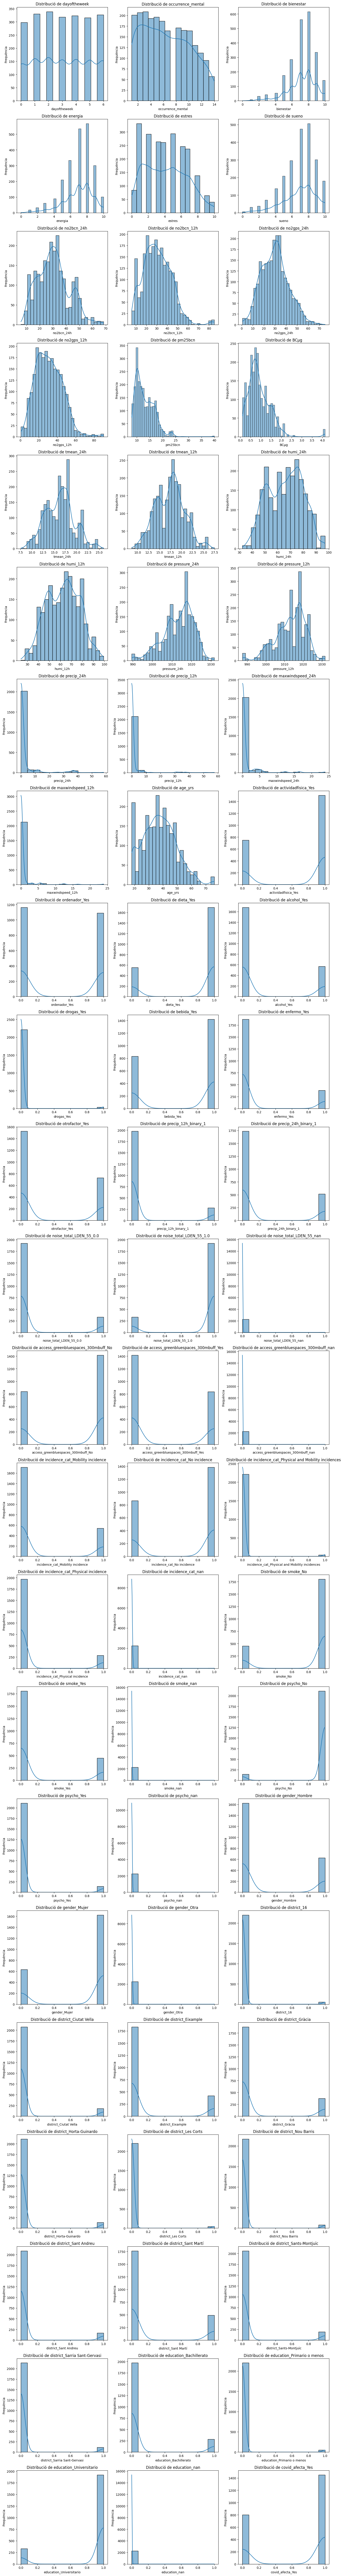

In [214]:
# Gráfics de distribució per variables numèriques
num_cols = X_train_encoded.select_dtypes(include='number').columns
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 3)

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
axs = axs.ravel()  

for i in range(len(axs)):
    if i < len(num_cols):
        sns.histplot(X_train_encoded[num_cols[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribució de {num_cols[i]}')
        axs[i].set_xlabel(num_cols[i])
        axs[i].set_ylabel('Frequència')
    else:
        fig.delaxes(axs[i]) 

plt.tight_layout()
plt.show()


Escalem les variables

In [216]:
from sklearn.preprocessing import MinMaxScaler

# Creem una còpia del DataFrame
X_train_std = X_train_encoded.copy()

# Apliquem la transformació MinMaxScaler a les variables numèriques originals
num_cols = X_train_encoded.select_dtypes(include='number').columns

# Creem un objecte MinMaxScaler i l'ajustem al conjunt de train
scaler = MinMaxScaler()
X_train_std[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])

# Apliquem la mateixa transformació al conjunt de test
X_test_std = X_test_encoded.copy()
X_test_std[num_cols] = scaler.transform(X_test_encoded[num_cols])

# Printejem les estadístiques de les variables numèriques (mínim, màxim i mitjana només) per a train i test
print("Estadístiques de les variables numèriques per a train:")
print(X_train_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

print("Estadístiques de les variables numèriques per a test:")
print(X_test_std[num_cols].describe().loc[['min', 'max', 'mean']])
print("\n")

Estadístiques de les variables numèriques per a train:
      dayoftheweek  occurrence_mental  bienestar   energia    estres    sueno  \
min       0.000000            0.00000   0.000000  0.000000  0.000000  0.00000   
max       1.000000            1.00000   1.000000  1.000000  1.000000  1.00000   
mean      0.503184            0.42077   0.723945  0.696313  0.419191  0.69187   

      no2bcn_24h  no2bcn_12h  no2gps_24h  no2gps_12h  ...  \
min     0.000000    0.000000    0.000000    0.000000  ...   
max     1.000000    1.000000    1.000000    1.000000  ...   
mean    0.394994    0.312814    0.393732    0.338689  ...   

      district_Nou Barris  district_Sant Andreu  district_Sant Martí  \
min              0.000000              0.000000              0.00000   
max              1.000000              1.000000              1.00000   
mean             0.035984              0.073745              0.21857   

      district_Sants-Montjuïc  district_Sarria Sant-Gervasi  \
min                   0

## Model de regressió lineal

In [222]:
# mirem nas a xtrainstd
print(X_train_encoded.isnull().sum())

ID_Zenodo                     728
dayoftheweek                  728
occurrence_mental             728
bienestar                     728
energia                       728
                             ... 
education_Bachillerato        728
education_Primario o menos    728
education_Universitario       728
education_nan                 728
covid_afecta_Yes              728
Length: 70, dtype: int64


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train_std ,y_train)
lr_r2_train = r2_score(y_train, lr.predict(X_train))
lr_r2_val = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2').mean()
lr_r2_test = r2_score(y_test, lr.predict(X_test_std))

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test_std, y_test, is_fitted=True)